In [45]:
from matplotlib import pyplot as plt
import numpy as np

# Topic composition of subreddits

In [46]:
keys =[]
with open("all_comms_keys.txt", "r") as f:
    for line in f:
        k = line.split("\t")[2].split(" ")
        keys.append(" ".join(k[:-1]))

In [47]:
# I created a topic model (with 20 topics) of the whole corpus of comments (positive and negative from all 
# three subreddits) using Mallet. The file ending in _commscomp.txt that I call with the following function contains 
# the topic composition of the collection of [valence] documents for the subreddit [sub].
def composition_matrix(sub, valence):
    #sub is subreddit, valence is "pos" or "neg"
    #Return a matrix containing the topic composition of each comment in [sub], [valence]. Shape:(num comments, 20) 
    with open(sub + "_"+ valence + "_commscomp.txt", "r") as inf:
        all_props = inf.readlines()
        doc_topics = np.zeros((len(all_props), 20))
        for i, idx in enumerate(all_props[1:]):
            row = idx.split("\t")[2:]
            doc_topics[i,:] = row
    return doc_topics

In [48]:
hillary_pos_comp = composition_matrix("hillaryclinton", "pos")
hillary_neg_comp = composition_matrix("hillaryclinton", "neg")
donald_pos_comp = composition_matrix("the_donald", "pos")
donald_neg_comp = composition_matrix("the_donald", "neg")
askreddit_pos_comp = composition_matrix("askreddit", "pos")
askreddit_neg_comp = composition_matrix("askreddit", "neg")

In [49]:
#composition of subreddit comment samples, regardless of valence
hillary_comp = (np.mean(hillary_pos_comp, axis=0) + np.mean(hillary_neg_comp, axis=0)) / 2
donald_comp = (np.mean(donald_pos_comp, axis=0) + np.mean(donald_neg_comp, axis=0)) / 2
askreddit_comp = (np.mean(askreddit_pos_comp, axis=0) + np.mean(askreddit_neg_comp, axis=0)) /2

## List of topics

In [50]:
# #each line is the top 20 words occurring in the corresponding topic
# for i, k in enumerate(keys):
#     print(str(i)+ ". " + keys[i])

Topics (I've bolded the ones that look relevant to the communities I'm examining):
0. **car gun stop driving called cars light drive speed road room guns fire back years city hit park police house**
1. show season episode character movie watching watch good watched series episodes story characters great made seasons shows pretty time funny
2. **abc schiff httpstwittercomconflictsstatus httpwwwgodlikeproductionscomforum message russian ukraines donbass ties males adam arms evidence christian white soros children cia dealer reminder**
3. **problem people system reason society good point change part fact true things agree social law real mental due issue human**
4. **money work pay people make tax buy government dont company business healthcare care free insurance jobs taxes cost working paid**
5. **trump comey president news fbi russia hes media investigation hillary election evidence press trumps russian clinton obama emails campaign letter**
6. people dont youre good doesnt make thing things point person feel theyre shit time lot isnt bad ive yeah makes
7. food eat drink hair pizza hot good water beer restaurant ice day free dont shit alcohol eating taste store bit
8. burn onions dinosaur weight big dinosaurs eat ocean fat animal live animals baby small large hide species size ill dino
9. **vote pen house state macron senators call district french round voting passed senator france senate express pass internet rep bill**
10. **school college high year kids students university teacher class schools education degree student lot job field experience teach learn parents**
11. **women men love sex rape brick make sexual god centipede man wall part lets gender girls woman male coat goal**
12. **trump hillary bernie party vote clinton election people democrats voters sanders voted win candidate didnt democratic won president supporters obama**
13. **god religion science climate islam muslims jesus christian world bible christians death religious change true models read children proof global**
14. questions post automatically removed action contact concerns question bot performed moderators message rule subredditmessagecomposetoraskreddit discussion title feel box taking review
15. **war country world american america countries government france nation germany europe history americans culture family state fight military states russia**
16. time day back didnt years guy told friend kids friends ive ago year family made good girl parents thought life
17. music comments tag child parent posts notice play usa song arent songs hour group answers jokes enjoy games rap listen
18. **post news read facebook comment media reddit edit video article posted day find thread fake google account comments posts articles**
19. **white people black racist women hate theyre rights race men economic liberal racism social class left gay identity group issues**

In [51]:
# rel_topics = [0,2,3,4,5,9,10,11,12,13,15,18,19]
# h_rel_topics = []
# for i, x in enumerate(np.mean(hillary_pos_comp, axis=0)):
#     if i in rel_topics: h_rel_topics.append(x)
# print(h_rel_topics)

## r/hillaryclinton

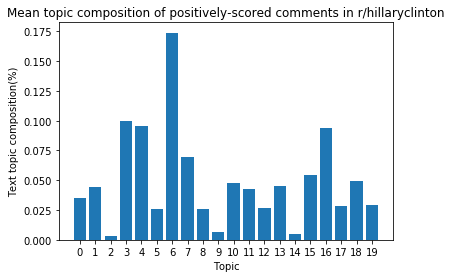

In [52]:
fig, ax=plt.subplots()
ax.bar(np.arange(20), np.mean(hillary_pos_comp, axis=0))
plt.xticks(np.arange(20), np.arange(20))
ax.set(title = "Mean topic composition of positively-scored comments in r/hillaryclinton", xlabel = "Topic", \
       ylabel = "Text topic composition(%)")
plt.show()

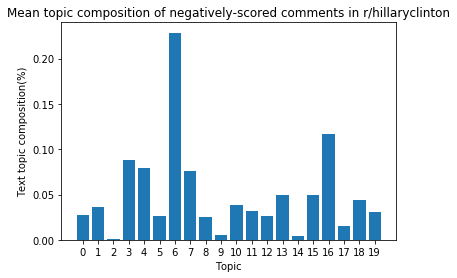

In [53]:
fig, ax=plt.subplots()
ax.bar(np.arange(20), np.mean(hillary_neg_comp, axis=0), )
plt.xticks(np.arange(20), np.arange(20))
ax.set(title = "Mean topic composition of negatively-scored comments in r/hillaryclinton", xlabel = "Topic", ylabel = "Text topic composition(%)")
plt.show()


## r/the_donald

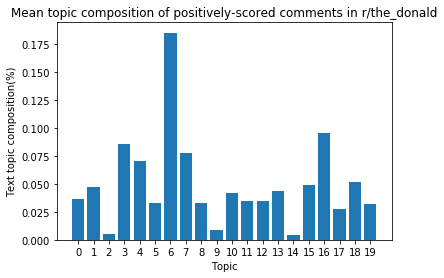

In [54]:
fig, ax=plt.subplots()
ax.bar(np.arange(20), np.mean(donald_pos_comp, axis=0))
plt.xticks(np.arange(20), np.arange(20))
ax.set(title = "Mean topic composition of positively-scored comments in r/the_donald", xlabel = "Topic", ylabel = "Text topic composition(%)")
plt.show()


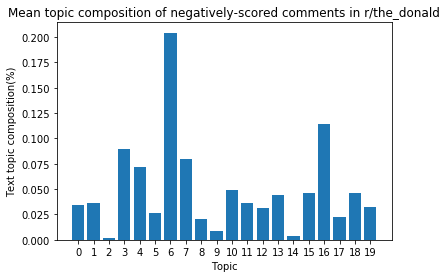

In [55]:
fig, ax=plt.subplots()
ax.bar(np.arange(20), np.mean(donald_neg_comp, axis=0))
plt.xticks(np.arange(20), np.arange(20))
ax.set(title = "Mean topic composition of negatively-scored comments in r/the_donald", xlabel = "Topic", ylabel = "Text topic composition(%)")
plt.show()

In [56]:
# fig, ax=plt.subplots()
# ax.bar(np.arange(20), donald_comp)
# plt.xticks(np.arange(20), np.arange(20))
# ax.set(title = "Mean topic composition of sampled tweets in r/the_donald", xlabel = "Topic", ylabel = "Text topic composition(%)")
# plt.show()

## r/askreddit
(third "control" reddit for comparison.)

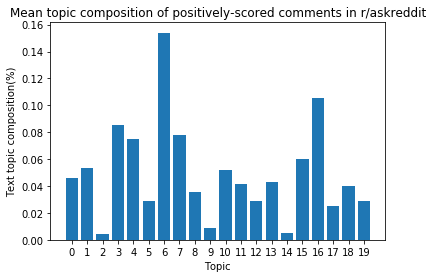

In [57]:
fig, ax=plt.subplots()
ax.bar(np.arange(20), np.mean(askreddit_pos_comp, axis=0))
plt.xticks(np.arange(20), np.arange(20))
ax.set(title = "Mean topic composition of positively-scored comments in r/askreddit", xlabel = "Topic", ylabel = "Text topic composition(%)")
plt.show()


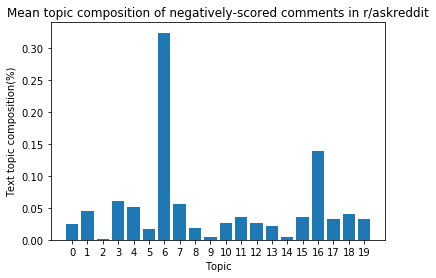

In [58]:
fig, ax=plt.subplots()
ax.bar(np.arange(20), np.mean(askreddit_neg_comp, axis=0))
plt.xticks(np.arange(20), np.arange(20))
ax.set(title = "Mean topic composition of negatively-scored comments in r/askreddit", xlabel = "Topic", ylabel = "Text topic composition(%)")
plt.show()

There doesn't seem to be much of a difference between the topic composition of the collection of positive and negative comments within a single community. 

In r/askreddit and r/ask hillary, there seems to be an increase in topic 6 from positive to negative comments. 
Topic 6 is a very generic topic, and makes up the highest percentage of all collections
"6. people dont youre good doesnt make thing things point person feel theyre shit time lot isnt bad ive yeah makes"
